In [ ]:
# Встановлення Kaggle API
!pip install -q kaggle

# Імпорт необхідних бібліотек
import os  # Для роботи з файловою системою
import zipfile  # Для роботи з архівами
import numpy as np  # Для математичних операцій
import tensorflow as tf  # Основний фреймворк для ML
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Генератори зображень
from tensorflow.keras.models import Sequential  # Лінійний стек шарів
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Шарі мережі
from tensorflow.keras.optimizers import Adam  # Оптимізатор
from tensorflow.keras.callbacks import EarlyStopping  # Рання зупинка
import matplotlib.pyplot as plt  # Візуалізація

In [ ]:
# Підключення Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження API ключа Kaggle
from google.colab import files
files.upload()  # Виберіть файл kaggle.json у вікні завантаження

# Налаштування доступу Kaggle API
!mkdir -p ~/.kaggle  # Створення директорії
!cp kaggle.json ~/.kaggle/  # Копіювання ключа
!chmod 600 ~/.kaggle/kaggle.json  # Встановлення прав доступу

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle  # Створює папку для конфігурації
!cp kaggle.json ~/.kaggle/  # Копіює ключ у потрібну папку
!chmod 600 ~/.kaggle/kaggle.json  # Встановлює права доступу

In [ ]:
!kaggle datasets list  # Має вивести список датасетів без помилок

ref                                                            title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance           Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          32899        593  1.0              
adilshamim8/social-media-addiction-vs-relationships            Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           6648         98  1.0              
atharvasoundankar/ai-developer-productivity-dataset            🧠 AI Developer Productivity Dataset                     5992  2025-05-12 08:29:17.290000           1769         62  1.0              
utkarshsharma11

In [ ]:
import kagglehub
moazeldsokyx_dogs_vs_cats_path = kagglehub.dataset_download('moazeldsokyx/dogs-vs-cats')

print('Data source import complete.')

Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [ ]:
train_dir = moazeldsokyx_dogs_vs_cats_path+'/dataset/train'
val_dir = moazeldsokyx_dogs_vs_cats_path+'/dataset/validation'
test_dir =moazeldsokyx_dogs_vs_cats_path+'/dataset/test'

In [ ]:
class_names = ['Cat', 'Dog']

datagen = ImageDataGenerator(rescale=1./255)

# Генератор для тренувального набору
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Генератор для валідаційного набору
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Генератор для тестового набору
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


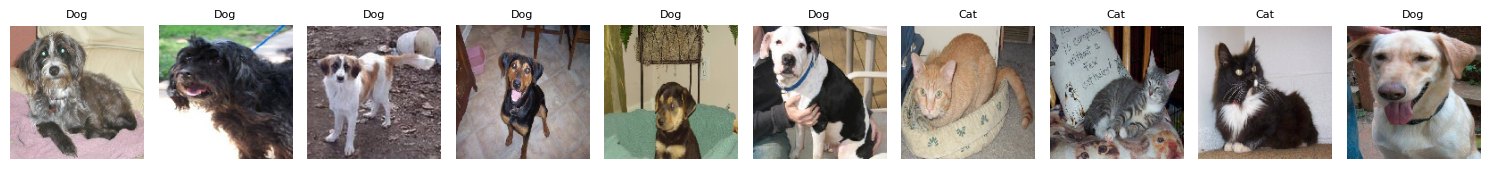

In [ ]:
import matplotlib.pyplot as plt # <-- ДОБАВЛЕНО

# Отримуємо новий набір зображень
images, labels = next(train_generator)

# Випадкові індекси для 10 зображень
indices = np.random.choice(len(images), size=10, replace=False)

# Візуалізація
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(class_names[int(labels[idx])], fontsize=8) # Убедитесь, что class_names определен
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input # <-- Добавлен Input

# Определяем входную форму
input_shape = (150, 150, 3)

model = Sequential([
    # Явно указываем Input слой как первый
    Input(shape=input_shape), # <-- Использование Input слоя
    # Згортковий шар 1
    Conv2D(32, (3, 3), activation='relu'), # input_shape здесь уже не нужен
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Згортковий шар 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Згортковий шар 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Плоскі шари
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Вихідний шар для двох класів
    Dense(1, activation='sigmoid') # binary classification
])

In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Callback-и
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=5  # Замість 100
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1693s 3s/step - accuracy: 0.5892 - loss: 2.0297 - val_accuracy: 0.6856 - val_loss: 0.6385
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1646s 3s/step - accuracy: 0.6807 - loss: 0.5855 - val_accuracy: 0.5568 - val_loss: 0.9803
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1677s 3s/step - accuracy: 0.7261 - loss: 0.5415 - val_accuracy: 0.6406 - val_loss: 0.7562
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1614s 3s/step - accuracy: 0.7470 - loss: 0.5100 - val_accuracy: 0.7398 - val_loss: 0.5150
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1696s 3s/step - accuracy: 0.7857 - loss: 0.4504 - val_accuracy: 0.7858 - val_loss: 0.4616


390/390 ━━━━━━━━━━━━━━━━━━━━ 198s 507ms/step - accuracy: 0.8430 - loss: 0.3428
Test accuracy: 79.10%


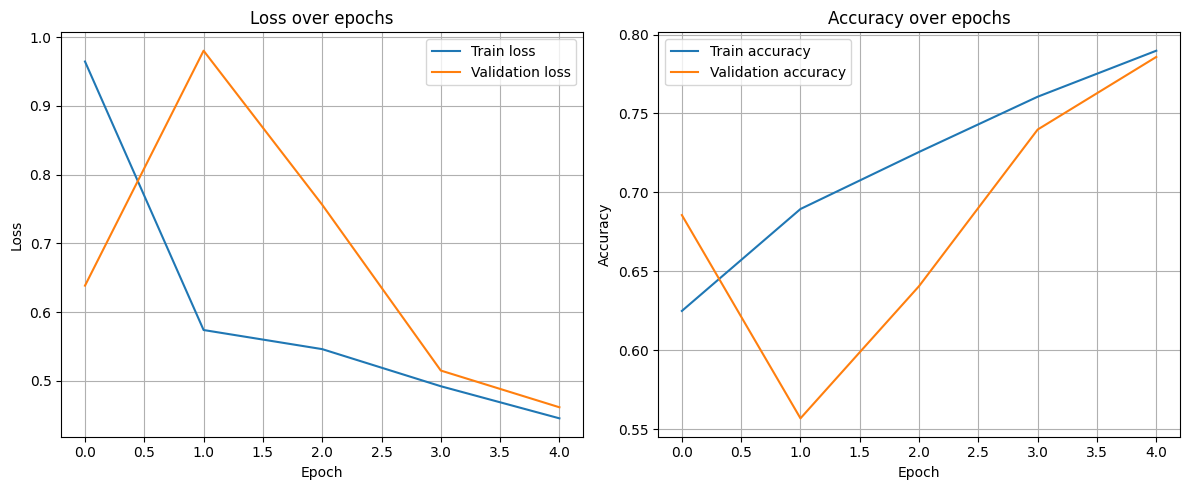

In [48]:
# 1. Оцінка моделі на тестових даних
loss, acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {acc:.2%}")  # Вивід точності у відсотках з двома знаками після коми

# 2. Візуалізація результатів навчання
plt.figure(figsize=(12, 5))  # Створення графічного вікна розміром 12x5 дюймів

# Графік втрат (loss)
plt.subplot(1, 2, 1)  # Створення першого субграфіка (1 рядок, 2 стовпці, позиція 1)
plt.plot(history.history['loss'], label='Train loss')  # Лінія тренувальних втрат
plt.plot(history.history['val_loss'], label='Validation loss')  # Лінія валідаційних втрат
plt.title('Loss over epochs')  # Заголовок
plt.grid()  # Включення сітки
plt.xlabel('Epoch')  # Підпис осі X
plt.ylabel('Loss')  # Підпис осі Y
plt.legend()  # Додавання легенди

# Графік точності (accuracy)
plt.subplot(1, 2, 2)  # Створення другого субграфіка
plt.plot(history.history['accuracy'], label='Train accuracy')  # Лінія тренувальної точності
plt.plot(history.history['val_accuracy'], label='Validation accuracy')  # Лінія валідаційної точності
plt.title('Accuracy over epochs')  # Заголовок
plt.xlabel('Epoch')  # Підпис осі X
plt.ylabel('Accuracy')  # Підпис осі Y
plt.grid()  # Включення сітки
plt.legend()  # Додавання легенди

plt.tight_layout()  # Автоматичне регулювання відступів
plt.show()  # Відображення графіків

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


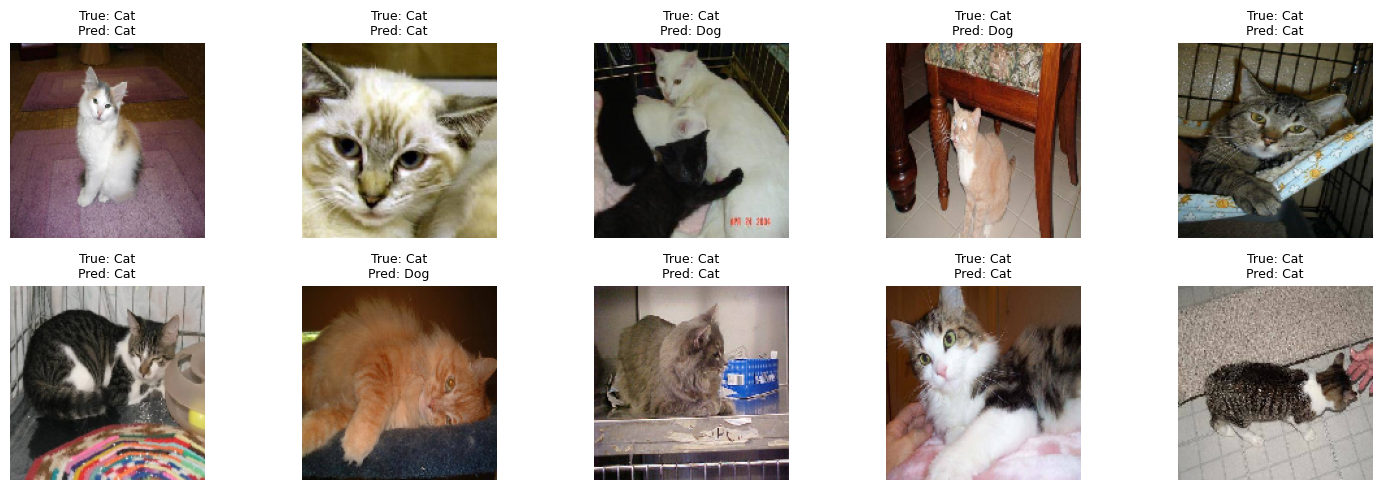

In [49]:
# Отримуємо batch із тестового генератора
images, true_labels = next(test_generator)

# Робимо передбачення
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

# Назви класів
class_names = ['Cat', 'Dog']

# Показуємо перші 10 зображень
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    true_class = class_names[int(true_labels[i])]
    pred_class = class_names[int(pred_labels[i])]
    plt.title(f"True: {true_class}\nPred: {pred_class}", fontsize=9)
plt.tight_layout()
plt.show()

У цій роботі було створено та навчено нейромережу для класифікації зображень котів і собак. Використано згорткову мережу (CNN), дані було завантажено з Kaggle, проведено візуалізацію, тренування на 5 епохах, оцінено точність та побудовано графіки помилки й точності.